In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [787]:
path = parentdir + "/final_models/"
dataset_names = ["cbf", "phalanges", "HARDataset", "EpilepticSeizureRecognition"]
dataset_names = ["esr", "har", "cbf", "poc"]
objects = ["blackboxes", "autoencoders"]

In [788]:
files = os.listdir(path)
csv_files = sorted([file for file in files if ".csv" in file])
df_dict = dict()
for csv in csv_files:
    df = pd.read_csv(path + csv, sep = ";", index_col = 0)
    df_dict[csv] = df
    

### Blackboxes

In [ ]:
# divido tabelle per metrica e metto solo test set

In [789]:
columns = ["RESNET", "CNN", "KNN"]
rows = ["ESR", "HAR", "CBF", "POC"]
rows = ["esr", "har", "cbf", "poc"]
#rows = ["EpilepticSeizureRecognition", "HumanActivityRecognition", "CylinderBellFunnel", "PhalangesOutileCorrect"]

In [259]:
accuracy_df = []
mse_df = []
for csv in df_dict:
    if "blackboxes" in csv:
        df = df_dict[csv]
        for column in df.columns:
            df[column] = [('%.3f' % (m)).replace('0.', '.') if m < 1.0 else '1.00' for m in df[column]]
        accuracy_df.append(df.loc["test_accuracy"].values)
        mse_df.append(df.loc["test_mse"].values)
accuracy_df = pd.DataFrame(accuracy_df, columns = columns, index = rows)
#accuracy_df.index.name = "DATASETS"
mse_df = pd.DataFrame(mse_df, columns = columns, index = rows)

final_dict = {"accuracy_df": accuracy_df, "mse_df": mse_df}

accuracy_df=accuracy_df.reset_index()
accuracy_df["metric"] = "acc"
mse_df=mse_df.reset_index()
mse_df["metric"] = "mse"
all_in_one_df = pd.concat([accuracy_df,mse_df]).set_index(['index', 'metric']).sort_values(by="index")

In [126]:
"""multi_index = []
for column in df.columns:
    for index in df.index:
        multi_index.append((column, index))
df_multi = pd.DataFrame([df.values.T.flatten()], columns = multi_index)
df_multi.columns = pd.MultiIndex.from_tuples(df_multi.columns)
df_multi[df_multi.columns[:6]]"""

'multi_index = []\nfor column in df.columns:\n    for index in df.index:\n        multi_index.append((column, index))\ndf_multi = pd.DataFrame([df.values.T.flatten()], columns = multi_index)\ndf_multi.columns = pd.MultiIndex.from_tuples(df_multi.columns)\ndf_multi[df_multi.columns[:6]]'

In [226]:
# separate df
for key in final_dict:
    df = final_dict[key]
    column_format = "|c|"
    for i in range(len(df.columns)):
        column_format += "c"
    column_format += "|"
    latex = df.to_latex(index = True, 
                               bold_rows = True,
                               column_format = column_format
                            #multicolumn_format = "c",
                            #multicolumn = True
                           )
    latex = latex.replace("toprule", "hline")
    latex = latex = latex.replace("midrule", "hline")
    latex = latex.replace("bottomrule", "hline")
    print("%{}".format(key))
    print(latex)
    print()
    print()
    print()

%accuracy_df
\begin{tabular}{|c|ccc|}
\hline
{} & RESNET &   CNN &   KNN \\
\hline
\textbf{esr} &   .978 &  .972 &  .865 \\
\textbf{har} &   .925 &  .891 &  .901 \\
\textbf{cbf} &   1.00 &  1.00 &  1.00 \\
\textbf{poc} &   .829 &  .768 &  .783 \\
\hline
\end{tabular}




%mse_df
\begin{tabular}{|c|ccc|}
\hline
{} & RESNET &   CNN &   KNN \\
\hline
\textbf{esr} &   .053 &  .081 &  .135 \\
\textbf{har} &   .266 &  .265 &  .146 \\
\textbf{cbf} &   .028 &  .350 &  .000 \\
\textbf{poc} &   .802 &  .489 &  .217 \\
\hline
\end{tabular}






In [286]:
df = all_in_one_df
column_format = "|c|c||""
for i in range(len(df.columns)):
    column_format += "c"
column_format += "|"
latex = df.to_latex(index = True, 
                    bold_rows = True,
                    column_format = column_format,
                    multirow = True)
latex = latex.replace("toprule", "hline")
latex = latex = latex.replace("midrule", "hline")
latex = latex.replace("bottomrule", "hline")
print("%{}".format(key))
print(latex)
print()
print()
print()

%phalanges_autoencoders_20191202_165821.csv
\begin{tabular}{|c|c||ccc|}
\hline
    &     & RESNET &   CNN &   KNN \\
\textbf{index} & \textbf{metric} &        &       &       \\
\hline
\multirow{2}{*}{\textbf{cbf}} & \textbf{acc} &   1.00 &  1.00 &  1.00 \\
    & \textbf{mse} &   .028 &  .350 &  .000 \\
\cline{1-5}
\multirow{2}{*}{\textbf{esr}} & \textbf{acc} &   .978 &  .972 &  .865 \\
    & \textbf{mse} &   .053 &  .081 &  .135 \\
\cline{1-5}
\multirow{2}{*}{\textbf{har}} & \textbf{acc} &   .925 &  .891 &  .901 \\
    & \textbf{mse} &   .266 &  .265 &  .146 \\
\cline{1-5}
\multirow{2}{*}{\textbf{poc}} & \textbf{acc} &   .829 &  .768 &  .783 \\
    & \textbf{mse} &   .802 &  .489 &  .217 \\
\hline
\end{tabular}






### Autoencoders

In [790]:
files = os.listdir(path)
csv_files = sorted([file for file in files if ".csv" in file])
df_dict = dict()
for csv in csv_files:
    df = pd.read_csv(path + csv, sep = ";", index_col = 0)
    df_dict[csv] = df
    

columns = ["RESNET", "CNN", "KNN"]
rows = ["AE-CNN", "VAE-CNN", "AAE-CNN", "AE-LSTM"]
final_dict = dict()
              
for csv in df_dict:
    if "autoencoders" in csv:
        df = df_dict[csv]
        df = df.loc[["reconstruction_resnet_test_accuracy",
                     "reconstruction_simplecnn_test_accuracy",
                     "reconstruction_knn_test_accuracy"]]
        for column in df.columns:
            df[column] = [('%.3f' % (m)).replace('0.', '.') if m < 1.0 else '1.00' for m in df[column]]
        final_dict[csv] = df
for dataset in final_dict:
    final_dict[dataset] = final_dict[dataset].T
    final_dict[dataset].columns = columns
    final_dict[dataset].index = rows

In [799]:
final_dict['EpilepticSeizureRecognition_autoencoders_20200106_191206.csv']

,RESNET,CNN,KNN
AE-CNN,.955,.964,.959
VAE-CNN,.941,.959,.801
AAE-CNN,.923,.937,.869
AE-LSTM,.511,.502,.602


In [800]:
for key in final_dict:
    df = final_dict[key]
    column_format = "|c||"
    for i in range(len(df.columns)):
        column_format += "c"
    column_format += "|"
    latex = df.to_latex(index = True, 
                               bold_rows = True,
                               column_format = column_format
                            #multicolumn_format = "c",
                            #multicolumn = True
                           )
    latex = latex.replace("toprule", "hline")
    latex = latex = latex.replace("midrule", "hline")
    latex = latex.replace("bottomrule", "hline")
    print("%{}".format(key))
    print(latex)
    print()
    print()
    print()

%EpilepticSeizureRecognition_autoencoders_20200106_191206.csv
\begin{tabular}{|c||ccc|}
\hline
{} & RESNET &   CNN &   KNN \\
\hline
\textbf{AE-CNN } &   .955 &  .964 &  .959 \\
\textbf{VAE-CNN} &   .941 &  .959 &  .801 \\
\textbf{AAE-CNN} &   .923 &  .937 &  .869 \\
\textbf{AE-LSTM} &   .511 &  .502 &  .602 \\
\hline
\end{tabular}




%HARDataset_autoencoders_20191202_171636.csv
\begin{tabular}{|c||ccc|}
\hline
{} & RESNET &   CNN &   KNN \\
\hline
\textbf{AE-CNN } &   .950 &  .910 &  .968 \\
\textbf{VAE-CNN} &   .776 &  .771 &  .769 \\
\textbf{AAE-CNN} &   .946 &  .912 &  .955 \\
\textbf{AE-LSTM} &   .337 &  .170 &  .394 \\
\hline
\end{tabular}




%cbf_autoencoders_20191201_133423.csv
\begin{tabular}{|c||ccc|}
\hline
{} & RESNET &   CNN &   KNN \\
\hline
\textbf{AE-CNN } &   1.00 &  .889 &  1.00 \\
\textbf{VAE-CNN} &   1.00 &  1.00 &  1.00 \\
\textbf{AAE-CNN} &   1.00 &  1.00 &  1.00 \\
\textbf{AE-LSTM} &   .333 &  .333 &  .333 \\
\hline
\end{tabular}




%phalanges_autoencoders_201

In [801]:
multi_index = []
for dataset in dataset_names:
    for column in df.columns:
        multi_index.append((dataset, column))
final_df = pd.DataFrame()
for dataset in final_dict.keys():
    final_df = pd.concat([final_df, final_dict[dataset]], axis = 1)
final_df.columns = multi_index
final_df.columns = pd.MultiIndex.from_tuples(final_df.columns)

In [805]:
final_df[[('esr', 'RESNET'),
          ('esr', 'CNN'),
          ('esr', 'KNN'),
 ('har', 'RESNET'),
 ('har', 'CNN'),
 ('har', 'KNN'),
 ('cbf', 'RESNET'),
 ('cbf', 'CNN'),
 ('cbf', 'KNN'),
 ('poc', 'RESNET'),
 ('poc', 'CNN'),
 ('poc', 'KNN')]]

[('esr', 'RESNET'),
 ('esr', 'CNN'),
 ('esr', 'KNN'),
 ('har', 'RESNET'),
 ('har', 'CNN'),
 ('har', 'KNN'),
 ('cbf', 'RESNET'),
 ('cbf', 'CNN'),
 ('cbf', 'KNN'),
 ('poc', 'RESNET'),
 ('poc', 'CNN'),
 ('poc', 'KNN')]

In [802]:
final_df[[""]]

esr                har                cbf                poc        \
        RESNET   CNN   KNN RESNET   CNN   KNN RESNET   CNN   KNN RESNET   CNN   
AE-CNN    .955  .964  .959   .950  .910  .968   1.00  .889  1.00   .972  .972   
VAE-CNN   .941  .959  .801   .776  .771  .769   1.00  1.00  1.00   .639  .500   
AAE-CNN   .923  .937  .869   .946  .912  .955   1.00  1.00  1.00   .926  .981   
AE-LSTM   .511  .502  .602   .337  .170  .394   .333  .333  .333   .676  .769   

               
          KNN  
AE-CNN   .963  
VAE-CNN  .648  
AAE-CNN  .963  
AE-LSTM  .778

In [216]:
# HORIZONTAL
df = final_df
column_format = "|c||"
for i in range(len(df.columns)):
    column_format += "c"
    if ((i + 1) % 3 == 0) and (i + 1 != len(df.columns)): column_format += "|"
column_format += "|"
latex = df.to_latex(index = True, 
                    bold_rows = True,
                    column_format = column_format,
                    multicolumn_format = "c",
                    )
latex = latex.replace("toprule", "hline")
latex = latex = latex.replace("midrule", "hline")
latex = latex.replace("bottomrule", "hline")
print("%{}".format(key))
print(latex)
print()
print()
print()

%phalanges_autoencoders_20191202_165821.csv
\begin{tabular}{|c||ccc|ccc|ccc|ccc|}
\hline
{} & \multicolumn{3}{c}{esr} & \multicolumn{3}{c}{har} & \multicolumn{3}{c}{cbf} & \multicolumn{3}{c}{poc} \\
{} & RESNET &   CNN &   KNN & RESNET &   CNN &   KNN & RESNET &   CNN &   KNN & RESNET &   CNN &   KNN \\
\hline
\textbf{AE-CNN } &   .955 &  .964 &  .959 &   .950 &  .910 &  .968 &   1.00 &  .889 &  1.00 &   .972 &  .972 &  .963 \\
\textbf{VAE-CNN} &   .941 &  .959 &  .801 &   .776 &  .771 &  .769 &   1.00 &  1.00 &  1.00 &   .639 &  .500 &  .648 \\
\textbf{AAE-CNN} &   .923 &  .937 &  .869 &   .946 &  .912 &  .955 &   1.00 &  1.00 &  1.00 &   .926 &  .981 &  .963 \\
\textbf{AE-LSTM} &   .511 &  .502 &  .602 &   .337 &  .170 &  .394 &   .333 &  .333 &  .333 &   .676 &  .769 &  .778 \\
\hline
\end{tabular}






In [221]:
# VERTICAL
df = final_df.T.sort_values(by="index")
column_format = "|c|c||"
for i in range(len(df.columns)):
    column_format += "c"
column_format += "|"
latex = df.to_latex(index = True, 
                    bold_rows = True,
                    #column_format = column_format,
                    multicolumn_format = "c",
                    multirow = True
                    )
latex = latex.replace("toprule", "hline")
latex = latex = latex.replace("midrule", "hline")
latex = latex.replace("bottomrule", "hline")
#print("%{}".format(key))
print(latex)
print()
print()
print()

\begin{tabular}{llllll}
\hline
    &     & AE-CNN & VAE-CNN & AAE-CNN & AE-LSTM \\
\hline
\multirow{3}{*}{\textbf{esr}} & \textbf{RESNET} &   .955 &    .941 &    .923 &    .511 \\
    & \textbf{CNN} &   .964 &    .959 &    .937 &    .502 \\
    & \textbf{KNN} &   .959 &    .801 &    .869 &    .602 \\
\cline{1-6}
\multirow{3}{*}{\textbf{har}} & \textbf{RESNET} &   .950 &    .776 &    .946 &    .337 \\
    & \textbf{CNN} &   .910 &    .771 &    .912 &    .170 \\
    & \textbf{KNN} &   .968 &    .769 &    .955 &    .394 \\
\cline{1-6}
\multirow{3}{*}{\textbf{cbf}} & \textbf{RESNET} &   1.00 &    1.00 &    1.00 &    .333 \\
    & \textbf{CNN} &   .889 &    1.00 &    1.00 &    .333 \\
    & \textbf{KNN} &   1.00 &    1.00 &    1.00 &    .333 \\
\cline{1-6}
\multirow{3}{*}{\textbf{poc}} & \textbf{RESNET} &   .972 &    .639 &    .926 &    .676 \\
    & \textbf{CNN} &   .972 &    .500 &    .981 &    .769 \\
    & \textbf{KNN} &   .963 &    .648 &    .963 &    .778 \\
\hline
\end{tabular}






### STABILITIES

In [484]:
path = parentdir + "/stabilities/"
dataset_names = ["cbf", "phalanges", "HARDataset", "EpilepticSeizureRecognition"]
dataset_names = ["esr", "har", "cbf", "poc"]
objects = ["blackboxes", "autoencoders"]
files = os.listdir(path)
npy_files = sorted([file for file in files if ".npy" in file if "shap_" in file])
df_dict = dict()
for npy in npy_files:
    df = np.load(path + npy)
    df_dict[npy] = df
shap_df_dict = df_dict 

In [485]:
stability_shap_df = {"knn":[], "resnet":[], "cnn":[]}
rows = dataset_names
k = 30
metric = "mean"
for npy in sorted(df_dict.keys()):
    df = df_dict[npy]
    stab = np.median(df_dict[npy][:,:,0][:,5])#.mean()
    dev = df_dict[npy][:,:,0][:,5].std()
    stab = ('%.3f' % (stab)).replace('0.', '.') if stab < 1.0 else ('%.2f' % (stab)) if stab < 10 else ('%.1f' % (stab)) if stab < 100 else ('%i' % (stab))
    dev = ('%.2f' % (dev)).replace('0.', '.') if dev < 1.0 else ('%.1f' % (dev)) if dev < 10 else ('%i' % (dev))
    res = stab + " ± " + dev
    if "knn" in npy:
        stability_shap_df["knn"].append(stab)
    elif "simplecnn" in npy:
        stability_shap_df["cnn"].append(stab)
    else:
        stability_shap_df["resnet"].append(stab)

stability_shap_df = pd.DataFrame(stability_shap_df, index = rows)




In [486]:
stability_shap_df

,knn,resnet,cnn
esr,.963,1.00,.972
har,.995,.995,1.00
cbf,.856,.878,.879
poc,.913,.974,.953


In [ ]:
### shapelets

In [487]:
path = parentdir + "/stabilities/"
dataset_names = ["cbf", "phalanges", "HARDataset", "EpilepticSeizureRecognition"]
dataset_names = ["esr", "har", "cbf", "poc"]
objects = ["blackboxes", "autoencoders"]
files = os.listdir(path)
npy_files = sorted([file for file in files if ".npy" in file if "shapelets" in file])
df_dict = dict()
for npy in npy_files:
    df = np.load(path + npy)
    df_dict[npy] = df
shapelet_df_dict = df_dict 

In [488]:
stability_shapelet_df = {"knn":[], "resnet":[], "cnn":[]}
rows = dataset_names
k = 30
metric = "mean"
for npy in sorted(df_dict.keys()):
    df = df_dict[npy]
    df[df==np.inf]=np.nan
    stab = np.nanmedian(df[:,0])#df[:,0].mean()
    dev = np.nanstd(df[:,0])
    stab = ('%.3f' % (stab)).replace('0.', '.') if stab < 1.0 else ('%.2f' % (stab)) if stab < 10 else ('%.1f' % (stab)) if stab < 100 else ('%i' % (stab))
    dev = ('%.2f' % (dev)).replace('0.', '.') if dev < 1.0 else ('%.1f' % (dev)) if dev < 10 else ('%i' % (dev))
    res = stab + " ± " + dev
    if "knn" in npy:
        stability_shapelet_df["knn"].append(stab)
    elif "simplecnn" in npy:
        stability_shapelet_df["cnn"].append(stab)
    else:
        stability_shapelet_df["resnet"].append(stab)

stability_shapelet_df = pd.DataFrame(stability_shapelet_df, index = rows)

In [489]:
stability_shapelet_df

,knn,resnet,cnn
esr,.877,1.01,.816
har,.234,.684,.771
cbf,.035,.167,.523
poc,.580,.904,.852


In [493]:
columns = []
for method in ["lasts", "shap"]:
    for column in stability_shapelet_df.columns:
        columns.append((column, method))
columns = pd.MultiIndex.from_tuples(columns)

In [494]:
df = pd.concat([stability_shapelet_df,stability_shap_df], axis = 1)
df.columns = columns
df = df.reindex(sorted(df.columns), axis=1)

In [765]:
df.columns

MultiIndex([(   'cnn', 'lasts'),
            (   'cnn',  'shap'),
            (   'knn', 'lasts'),
            (   'knn',  'shap'),
            ('resnet', 'lasts'),
            ('resnet',  'shap')],
           )

In [770]:
df = df[["resnet", "cnn", "knn"]].loc[["cbf","esr","har", "poc"]]

In [771]:

column_format = "|c||"
for i in range(len(df.columns)):
    column_format += "c"
column_format += "|"
latex = df.to_latex(index = True, 
                    bold_rows = True,
                    column_format = column_format,
                    multicolumn_format = "c",
                    multirow = False)
latex = latex.replace("toprule", "hline")
latex = latex = latex.replace("midrule", "hline")
latex = latex.replace("bottomrule", "hline")
print("%{}".format(key))
print(latex)
print()
print()
print()

%poc
\begin{tabular}{|c||cccccc|}
\hline
{} & \multicolumn{2}{c}{resnet} & \multicolumn{2}{c}{cnn} & \multicolumn{2}{c}{knn} \\
{} &  lasts &  shap & lasts &  shap & lasts &  shap \\
\hline
\textbf{cbf} &   .167 &  .878 &  .523 &  .879 &  .035 &  .856 \\
\textbf{esr} &   1.01 &  1.00 &  .816 &  .972 &  .877 &  .963 \\
\textbf{har} &   .684 &  .995 &  .771 &  1.00 &  .234 &  .995 \\
\textbf{poc} &   .904 &  .974 &  .852 &  .953 &  .580 &  .913 \\
\hline
\end{tabular}






In [507]:
shap_df_dict['EpilepticSeizureRecognition_stability_shap_20200121_163546_knn.npy'][:,:,0][:,5].shape

(50,)

In [731]:
shap_df_dict.keys()

dict_keys(['EpilepticSeizureRecognition_stability_shap_20200121_163546_knn.npy', 'EpilepticSeizureRecognition_stability_shap_20200121_163546_resnet.npy', 'EpilepticSeizureRecognition_stability_shap_20200121_163546_simplecnn.npy', 'HARDataset_stability_shap_20200121_163723_knn.npy', 'HARDataset_stability_shap_20200121_163723_resnet.npy', 'HARDataset_stability_shap_20200121_163723_simplecnn.npy', 'cbf_stability_shap_20200121_121614_knn.npy', 'cbf_stability_shap_20200121_121614_resnet.npy', 'cbf_stability_shap_20200121_121614_simplecnn.npy', 'phalanges_stability_shap_20200121_122615_knn.npy', 'phalanges_stability_shap_20200121_122615_resnet.npy', 'phalanges_stability_shap_20200121_122615_simplecnn.npy'])

In [775]:
final_dict = {"cbf":[], "esr":[], "har":[], "poc":[]}
columns = ["knn", "resnet", "cnn", "knn_b", "resnet_b", "cnn_b"]
for key in sorted(shapelet_df_dict.keys()):
    if "cbf" in key:
        array = shapelet_df_dict[key][:,0]
        array[array==np.inf]=np.nan
        final_dict["cbf"].append(array)
    elif "Epileptic" in key:
        array = shapelet_df_dict[key][:,0]
        array[array==np.inf]=np.nan
        final_dict["esr"].append(array)
    elif "HARDataset" in key:
        array = shapelet_df_dict[key][:,0]
        array[array==np.inf]=np.nan
        final_dict["har"].append(array)
    else:
        array = shapelet_df_dict[key][:,0]
        array[array==np.inf]=np.nan
        final_dict["poc"].append(array)
for key in sorted(shap_df_dict.keys()):
    if "cbf" in key:
        final_dict["cbf"].append(shap_df_dict[key][:,:,0][:,5])
    elif "Epileptic" in key:
        final_dict["esr"].append(shap_df_dict[key][:,:,0][:,5])
    elif "HARDataset" in key:
        final_dict["har"].append(shap_df_dict[key][:,:,0][:,5])
    else:
        final_dict["poc"].append(shap_df_dict[key][:,:,0][:,5])
        
for key in sorted(final_dict.keys()):
    final_dict[key] = pd.DataFrame(np.array(final_dict[key]).T, columns = columns)
    final_dict[key] = final_dict[key].reindex(sorted(final_dict[key].columns), axis=1)
    final_dict[key] = final_dict[key][["resnet","resnet_b","cnn","cnn_b","knn", "knn_b"]]
#cbf = pd.DataFrame(np.array(cbf).T, columns = columns)
#cbf = cbf.reindex(sorted(cbf.columns), axis=1)

cbf


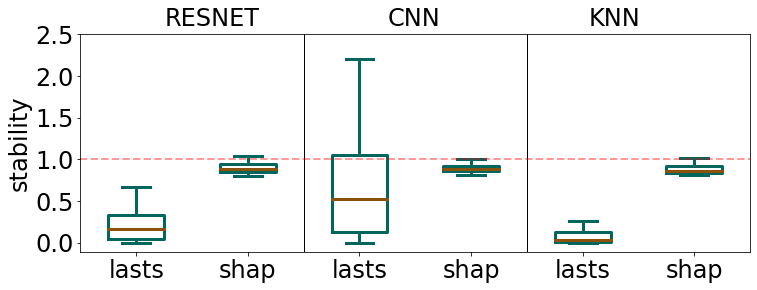

esr


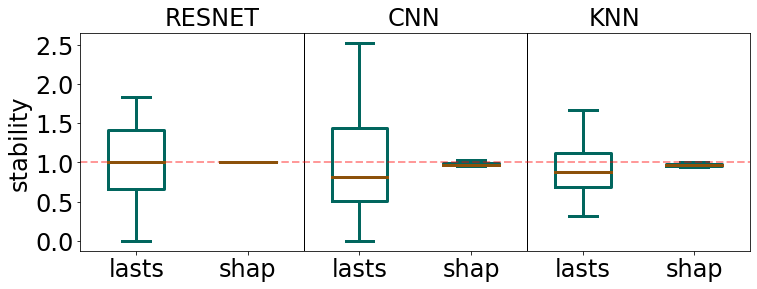

har


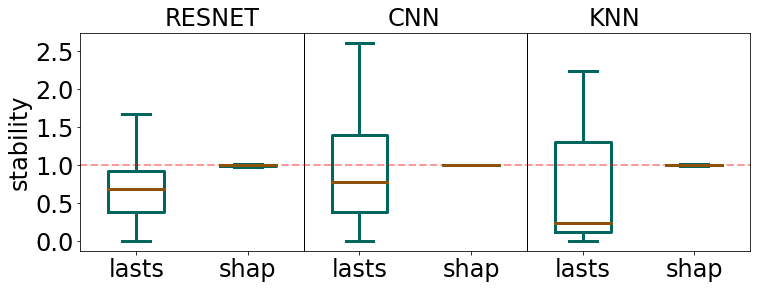

poc


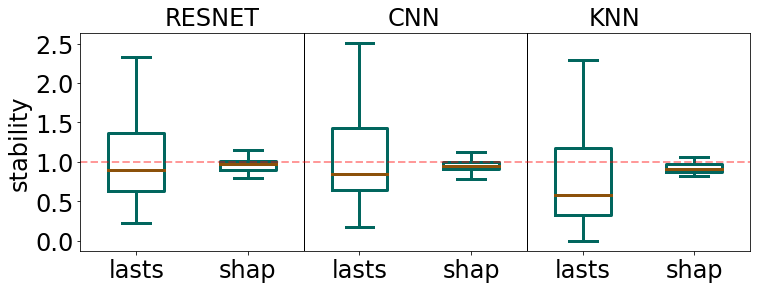

In [777]:
for key in sorted(final_dict.keys()):
    print(key)
    data = final_dict[key].values
    fontsize = 24

    mask = ~np.isnan(data)
    filtered_data = [d[m] for d, m in zip(data.T, mask.T)]

    plt.figure(figsize=(12,4))
    medianprops = dict(linestyle='-', linewidth=3, color='#8c510a')
    meanprops = dict(marker='D',  markeredgecolor='#003c30', markerfacecolor='#003c30')
    boxprops = dict(linestyle='-', linewidth=3, color='#01665e')
    whiskerprops = dict(linestyle='-', linewidth=3, color='#01665e')
    capprops = dict(linestyle='-', linewidth=3, color='#01665e')

    plt.boxplot(filtered_data, medianprops=medianprops, boxprops=boxprops, capprops=capprops,
                whiskerprops=whiskerprops, meanprops=meanprops, showmeans=False, showfliers = False)
    plt.xticks(range(1, len(filtered_data)+1), ['lasts', 'shap'] * (len(filtered_data)//2), fontsize=fontsize)
    plt.yticks(np.arange(0.0, 2.6, 0.5), fontsize=fontsize)
    plt.ylabel("stability", fontsize=fontsize)
    #plt.title(black_box, fontsize=fontsize, pad=30)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    """means = np.mean(np.stack(data.values.T), axis=0)
    for i, m in enumerate(means):
        plt.text(i+0.9, 1.1, ('%.2f' % m).replace('0.', '.'), fontsize=fontsize)"""
    plt.text(1.25, plt.gca().get_ylim()[1]+0.1, 'RESNET', fontsize=fontsize)
    plt.text(3.25, plt.gca().get_ylim()[1]+0.1, 'CNN', fontsize=fontsize)
    plt.text(5.05, plt.gca().get_ylim()[1]+0.1, 'KNN', fontsize=fontsize)
    plt.axvline(x=2.5, color='k', lw=1)
    plt.axvline(x=4.5, color='k', lw=1)
    plt.axhline(y=1, color='r', linestyle='--', alpha = 0.4, lw=2)
    #plt.savefig(path_fig + 'boxplot_%s_%s_%s.png' % (measure, black_box, neigh_type), format='png', bbox_inches='tight')
    plt.show()

(0.0, 1.0)

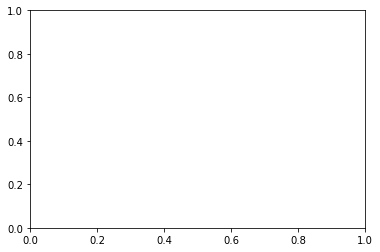

In [739]:
plt.gca().get_ylim()

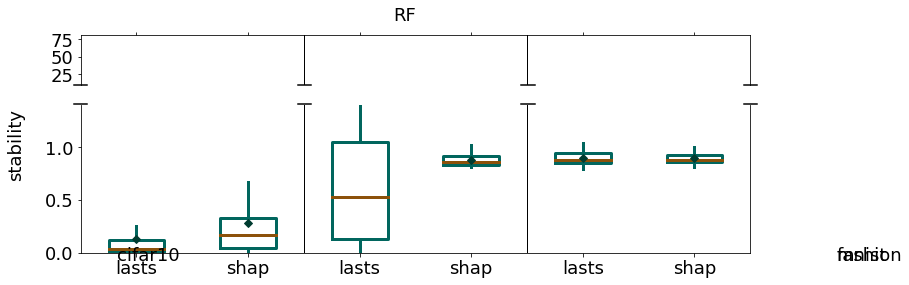

In [681]:
title = 'RF'

fontsize = 18
data = pd.DataFrame(cbf).values.T

mask = ~np.isnan(data)
filtered_data = [d[m] for d, m in zip(data.T, mask.T)]

medianprops = dict(linestyle='-', linewidth=3, color='#8c510a')
meanprops = dict(marker='D',  markeredgecolor='#003c30', markerfacecolor='#003c30')
boxprops = dict(linestyle='-', linewidth=3, color='#01665e')
whiskerprops = dict(linestyle='-', linewidth=3, color='#01665e')
capprops = dict(linestyle='-', linewidth=3, color='#01665e')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4),gridspec_kw={'height_ratios': [1,3]})
fig.suptitle(black_box, fontsize=fontsize)#, pad=30)

ymin_ax1=10
ymin_ax2=0
ymax_ax1=80
ymax_ax2=1.4

ax1.axvline(x=2.5, color='k', lw=1)
ax1.axvline(x=4.5, color='k', lw=1)
ax2.axvline(x=2.5, color='k', lw=1)
ax2.axvline(x=4.5, color='k', lw=1)

# BROKEN AXIS
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (0.5*d, 0.5*d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (0.5*d, 0.5*d), **kwargs)  # top-right diagonal
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((0.668 - d, 0.668 + d), (0.5*d, 0.5*d), **kwargs) 
ax1.plot((0.334 - d, 0.334 + d), (0.5*d, 0.5*d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs)  # bottom-right diagonal
ax2.plot((0.668 - d, 0.668 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs) 
ax2.plot((0.334 - d, 0.334 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs) 

# BOXPLOTS
ax1.boxplot(filtered_data,medianprops=medianprops, boxprops=boxprops, capprops=capprops,
            whiskerprops=whiskerprops, meanprops=meanprops, showmeans=True, showcaps = False, showfliers = False)
ax1.set_ylim(ymin=ymin_ax1,ymax=ymax_ax1)
ax2.boxplot(filtered_data,medianprops=medianprops, boxprops=boxprops, capprops=capprops,
            whiskerprops=whiskerprops, meanprops=meanprops, showmeans=True, showcaps = False, showfliers = False)
ax2.set_ylim(ymin=ymin_ax2,ymax=ymax_ax2)


#ax1.yticks(np.arange(ymin_ax1,ymax_ax1,10), fontsize=fontsize)
#ax1.yticks(np.arange(ymin_ax2,ymax_ax2,0.2), fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
plt.xticks(range(1, len(filtered_data)+1), ['lasts', 'shap'] * (len(filtered_data)//2), fontsize=fontsize)






"""means = np.mean(np.stack(data.values.T), axis=0)
for i, m in enumerate(means):
    plt.text(i+0.9, 1.1, ('%.2f' % m).replace('0.', '.'), fontsize=fontsize)"""
fig.text(1/6, 0.1, 'cifar10', fontsize=fontsize)#, va = "center")
fig.text(1, 0.1, 'fashion', fontsize=fontsize)
fig.text(1, 0.1, 'mnist', fontsize=fontsize)
#plt.savefig(path_fig + 'boxplot_%s_%s_%s.png' % (measure, black_box, neigh_type), format='png', bbox_inches='tight')
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'stability', va='center', rotation='vertical', fontsize=fontsize)
plt.show()

In [ ]:
title = 'RF'

fontsize = 18
data = pd.DataFrame(cbf).values.T

mask = ~np.isnan(data)
filtered_data = [d[m] for d, m in zip(data.T, mask.T)]

medianprops = dict(linestyle='-', linewidth=3, color='#8c510a')
meanprops = dict(marker='D',  markeredgecolor='#003c30', markerfacecolor='#003c30')
boxprops = dict(linestyle='-', linewidth=3, color='#01665e')
whiskerprops = dict(linestyle='-', linewidth=3, color='#01665e')
capprops = dict(linestyle='-', linewidth=3, color='#01665e')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4),gridspec_kw={'height_ratios': [1,3]})
fig.suptitle(black_box, fontsize=fontsize)#, pad=30)

ymin_ax1=10
ymin_ax2=0
ymax_ax1=80
ymax_ax2=1.4

ax1.axvline(x=2.5, color='k', lw=1)
ax1.axvline(x=4.5, color='k', lw=1)
ax2.axvline(x=2.5, color='k', lw=1)
ax2.axvline(x=4.5, color='k', lw=1)

# BROKEN AXIS
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (0.5*d, 0.5*d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (0.5*d, 0.5*d), **kwargs)  # top-right diagonal
#ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((0.668 - d, 0.668 + d), (0.5*d, 0.5*d), **kwargs) 
ax1.plot((0.334 - d, 0.334 + d), (0.5*d, 0.5*d), **kwargs) 

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs)  # bottom-right diagonal
ax2.plot((0.668 - d, 0.668 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs) 
ax2.plot((0.334 - d, 0.334 + d), (1 + (0.5*d), 1 + (0.5*d)), **kwargs) 

# BOXPLOTS
ax1.boxplot(filtered_data,medianprops=medianprops, boxprops=boxprops, capprops=capprops,
            whiskerprops=whiskerprops, meanprops=meanprops, showmeans=True, showcaps = False, showfliers = False)
ax1.set_ylim(ymin=ymin_ax1,ymax=ymax_ax1)
ax2.boxplot(filtered_data,medianprops=medianprops, boxprops=boxprops, capprops=capprops,
            whiskerprops=whiskerprops, meanprops=meanprops, showmeans=True, showcaps = False, showfliers = False)
ax2.set_ylim(ymin=ymin_ax2,ymax=ymax_ax2)


#ax1.yticks(np.arange(ymin_ax1,ymax_ax1,10), fontsize=fontsize)
#ax1.yticks(np.arange(ymin_ax2,ymax_ax2,0.2), fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
plt.xticks(range(1, len(filtered_data)+1), ['lasts', 'shap'] * (len(filtered_data)//2), fontsize=fontsize)






"""means = np.mean(np.stack(data.values.T), axis=0)
for i, m in enumerate(means):
    plt.text(i+0.9, 1.1, ('%.2f' % m).replace('0.', '.'), fontsize=fontsize)"""
fig.text(1/6, 0.1, 'cifar10', fontsize=fontsize)#, va = "center")
fig.text(1, 0.1, 'fashion', fontsize=fontsize)
fig.text(1, 0.1, 'mnist', fontsize=fontsize)
#plt.savefig(path_fig + 'boxplot_%s_%s_%s.png' % (measure, black_box, neigh_type), format='png', bbox_inches='tight')
#fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.04, 0.5, 'stability', va='center', rotation='vertical', fontsize=fontsize)
plt.show()